In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = !pwd
path = path[0]
path

'/Users/seraina/Documents/Studium/bachelor-project/code_for_article_final'

# Analysing the model
The model is evaluated with respect to the normalized average utility. For every figure we run 50-100 realizations with different random seeds. The curves in the figures show the mean value over the realizations and the error bands correspond to the interquartile range.


average utility: $U$

Normalized average utility: $\frac{U - \min U}{\max U - min U}$


## Phase 1: Average utility of the best solution in the repository vs. time per agent
The time per agent corresponds to the number of iterations per agent k for creating solutions in phase 1.  In phase 1 steps 1. – 4. are repeated k\N times.  We vary k to study how the average utilities of the created solutions depend on the time per agent. 

For this, the model is run in the script 'main_phase1_timeperagent.py'.

### Visualisation of the data that was produced by running the script 'main_phase1_timeperagent.py'

/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_3347/1936713564.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  fig = sns.lineplot(data, x='iterations per agent', y='normalized average utility of best design', errorbar=('pi', 50), hue='number of agents', palette=sns.color_palette())


[Text(0, 0.5, 'average utility of best solution $(V(S*))$'),
 Text(0.5, 0, 'time per agent $(k)$'),
 (0.0, 1.0)]

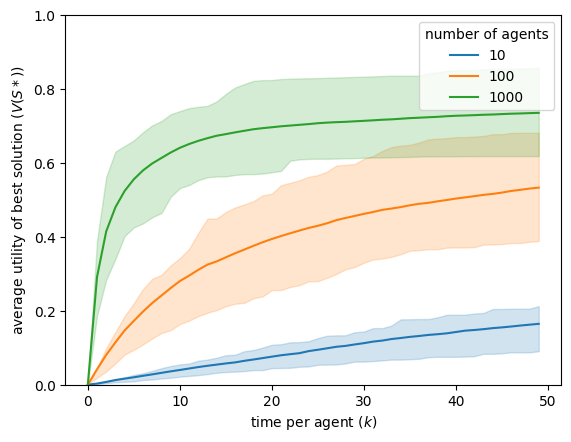

In [17]:
data = pd.read_csv(path+'/data/final/tpera.csv')
data['normalized average utility of best design'] = (data['average utility of best design'] - data['smin'])/(data['smax']-data['smin'])
fig = sns.lineplot(data, x='iterations per agent', y='normalized average utility of best design', errorbar=('pi', 50), hue='number of agents', palette=sns.color_palette())
fig.set(ylabel="average utility of best solution $(V(S*))$", xlabel='time per agent $(k)$', ylim=[0,1])

In [5]:
### print data to csv:
#cols = ['iterations per agent', 'number of agents','random seed','average utility of best design','smax','smin','number of created designs']
#data = data[cols]
#data.to_csv(path+'/data/final/data_timeperagent.csv')

# Phase 1 + 2: Number of agents vs. avg. utility of final solution after running phase 1 and 2
### Visualisation of the the data that was produced by running the script 'main_number_of_agents.py'



/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_3347/964823021.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig1 = sns.lineplot(data, x='number of agents', y='smax', errorbar=('pi',50), palette=sns.color_palette(), label='smax')
/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_3347/964823021.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig1 = sns.lineplot(data, x='number of agents', y='smin', errorbar=('pi',50), palette=sns.color_palette(), label='smin')


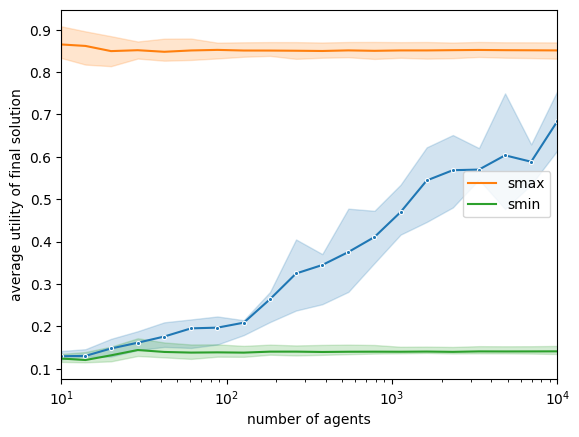

In [6]:

data = pd.read_csv(path+'/data/numagents/50reps_10-10000as.csv')


cols = data.columns

#normalize data:
dist = data['smax']- data['smin']
data['normalized average utility of voted design'] = (data['average utility of voted design'] - data['smin']) / dist
data['normalized average utility of best design'] = (data['average utility of best design'] - data['smin']) / dist

data['voting ratio stage 1+2'] = data['normalized average utility of voted design'] / data['normalized average utility of best design']


fig1 = sns.lineplot(data, x='number of agents', y='average utility of voted design', errorbar=('pi',50), marker='.')
fig1.set(ylabel='average utility of final solution', xlabel = 'number of agents', xscale='log', xlim=[10,10000])

fig1.set(xscale='log')
fig1 = sns.lineplot(data, x='number of agents', y='smax', errorbar=('pi',50), palette=sns.color_palette(), label='smax')
fig1 = sns.lineplot(data, x='number of agents', y='smin', errorbar=('pi',50), palette=sns.color_palette(), label='smin')

/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_3347/943139545.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.lineplot(data, x='number of agents', y='normalized average utility of best design', errorbar=('pi',50), palette=sns.color_palette())


[(0.0, 1.0),
 None,
 Text(0, 0.5, 'normalized average utility of final solution'),
 (10, 10000)]

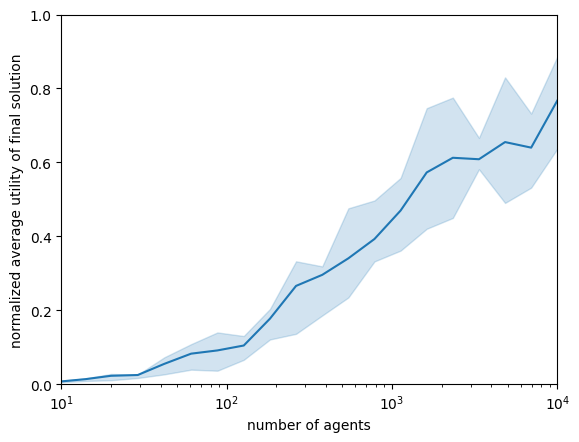

In [7]:
fig = sns.lineplot(data, x='number of agents', y='normalized average utility of best design', errorbar=('pi',50), palette=sns.color_palette())
fig.set(ylim=[0,1],  xscale='log',ylabel='normalized average utility of final solution', xlim=[10,10000])

/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_3347/2915512105.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.lineplot(data, x='number of agents', y='number of created designs', errorbar=('pi',50), palette=sns.color_palette(), label='number of designs in repo', marker='.')


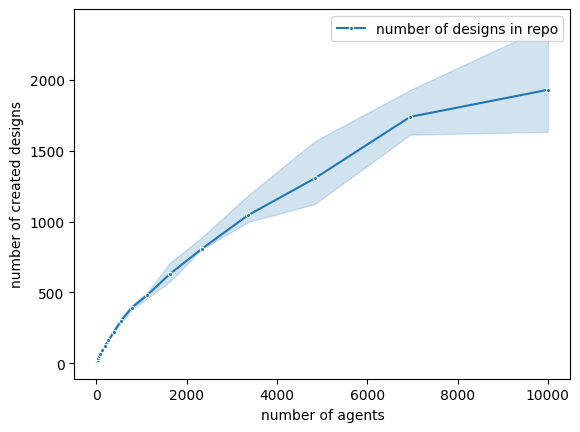

In [8]:

fig = sns.lineplot(data, x='number of agents', y='number of created designs', errorbar=('pi',50), palette=sns.color_palette(), label='number of designs in repo', marker='.')


# Evaluation of phase 2: voting

### evaluating voting phase 2 on the repository after running phase 1
To study, how the agents select a final solution through voting we vary the number of votes per design in the first step of phase 2 and compute the ratio between the average utility of the final solution that the agents vote for and the best possible solution they created:

Voting ratio = $\frac{V\left(S_{voted}\right)}{max_{Repository}V}$

#### Visualisation of the data that was produced by running the script 'main_phase2_voting.py':

/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_3347/3014223941.py:17: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.lineplot(data, ax=ax1, x='votes per solution', y='voting ratio stage 1', errorbar=('pi',50), hue='number of agents', palette=sns.color_palette())
/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_3347/3014223941.py:21: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.lineplot(data, ax=ax2, x='votes per solution', y='voting ratio stage 1+2',  hue='number of agents', errorbar=('pi',50), palette=sns.color_palette())


[Text(0.5, 1.0, 'Stage 1+2'), None]

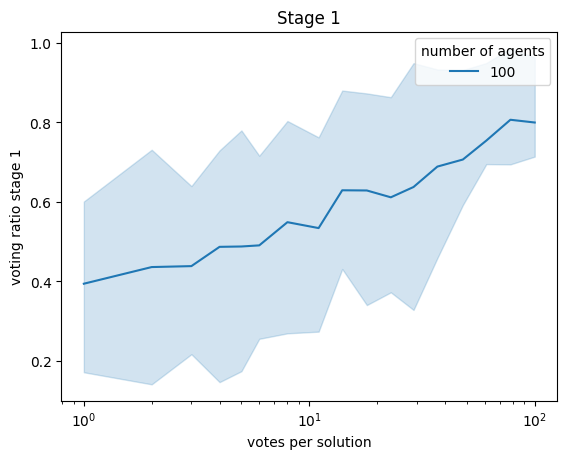

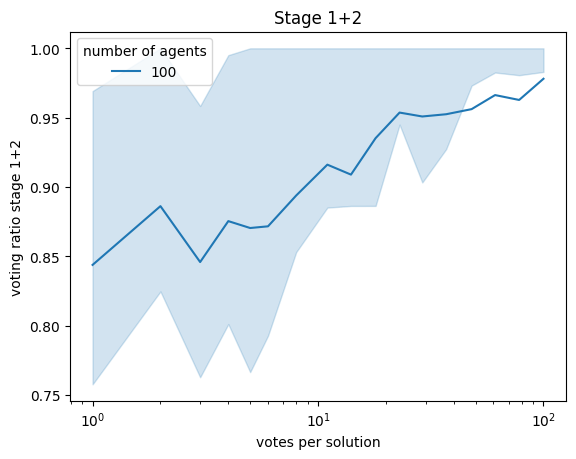

In [9]:
data = pd.read_csv(path+'/data/final/phase2_on_repo.csv')

data = data[data['number of agents'] == 100]

#normalize the data:
dist = data['smax']- data['smin']
data['dist'] = dist
data['normalized average utility of best design'] = (data['average utility of best design'] - data['smin']) / dist
data['normalized average utility of final design (stage 1)'] = (data['average utility of final design (stage 1)'] - data['smin']) / dist
data['normalized average utility of final design (stage 1+2)'] = (data['average utility of final design (stage 1+2)'] - data['smin']) / dist

data['voting ratio stage 1'] = (data['average utility of final design (stage 1)']-data['smin']) / (data['average utility of best design']-data['smin'])
data['voting ratio stage 1+2'] = (data['average utility of final design (stage 1+2)']-data['smin'])/ (data['average utility of best design']-data['smin'])


fig1, ax1 = plt.subplots()
sns.lineplot(data, ax=ax1, x='votes per solution', y='voting ratio stage 1', errorbar=('pi',50), hue='number of agents', palette=sns.color_palette())
ax1.set(title='Stage 1', xscale='log')

fig2, ax2 = plt.subplots()
sns.lineplot(data, ax=ax2, x='votes per solution', y='voting ratio stage 1+2',  hue='number of agents', errorbar=('pi',50), palette=sns.color_palette())
ax2.set(title='Stage 1+2', xscale='log')



### voting on random designs
We also tested the voting steps 1 and 2 on randomly distributed designs in the repository (function 'voting_on_uniform_distr' in the script 'main_phase_2_voting.py')

/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_3347/3708273035.py:23: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(data, ax=ax1, x='votes per solution', y='voting ratio stage 1', errorbar=('pi',50), hue=hue, palette=sns.color_palette())
/var/folders/dc/pggcdl8s6bj387np0g6_cd1h0000gn/T/ipykernel_3347/3708273035.py:27: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(data, ax=ax2, x='votes per solution', y='voting ratio stage 1+2',  hue=hue, palette=sns.color_palette(), errorbar=('pi',50))


[Text(0.5, 1.0, 'Stage 1+2'), None]

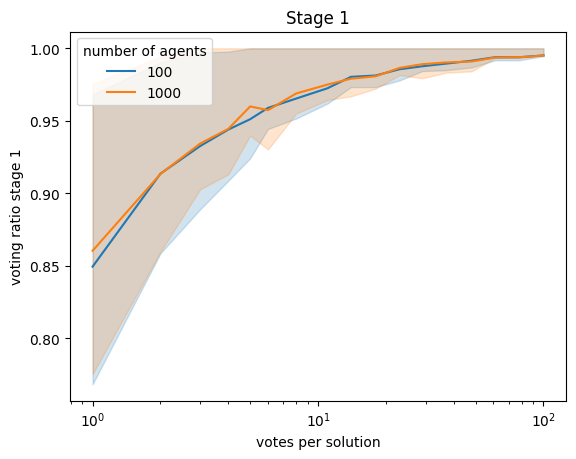

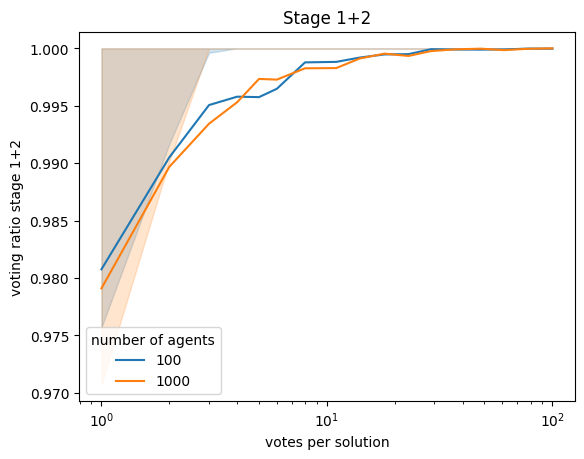

In [10]:
data = pd.read_csv(path+'/data/final/randomRepo.csv')

#data = data[data['number of agents']==100] 
#hue = 'number of created designs'

#data = data[data['number of created designs']==101] 
hue = 'number of agents'

#normalize data:
dist = data['smax']- data['smin']
data['dist'] = dist
data['normalized average utility of best design'] = (data['average utility of best design'] - data['smin']) / dist
data['normalized average utility of final design (stage 1)'] = (data['average utility of final design (stage 1)'] - data['smin']) / dist
data['normalized average utility of final design (stage 1+2)'] = (data['average utility of final design (stage 1+2)'] - data['smin']) / dist

data['designs per agent'] = data['number of created designs'] / data['number of agents']

data['voting ratio stage 1'] = (data['average utility of final design (stage 1)']-data['smin']) / (data['average utility of best design']-data['smin'])
data['voting ratio stage 1+2'] = (data['average utility of final design (stage 1+2)']-data['smin'])/ (data['average utility of best design']-data['smin'])


fig1, ax1 = plt.subplots()
sns.lineplot(data, ax=ax1, x='votes per solution', y='voting ratio stage 1', errorbar=('pi',50), hue=hue, palette=sns.color_palette())
ax1.set(title='Stage 1', xscale='log')

fig2, ax2 = plt.subplots()
sns.lineplot(data, ax=ax2, x='votes per solution', y='voting ratio stage 1+2',  hue=hue, palette=sns.color_palette(), errorbar=('pi',50))
ax2.set(title='Stage 1+2', xscale='log')

[Text(0.5, 1.0, 'Stage 1+2'), None]

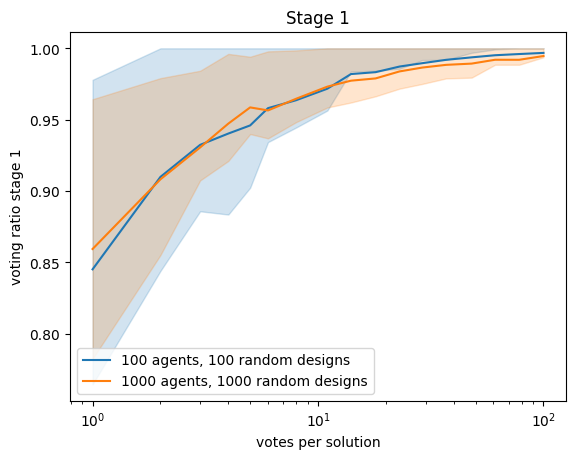

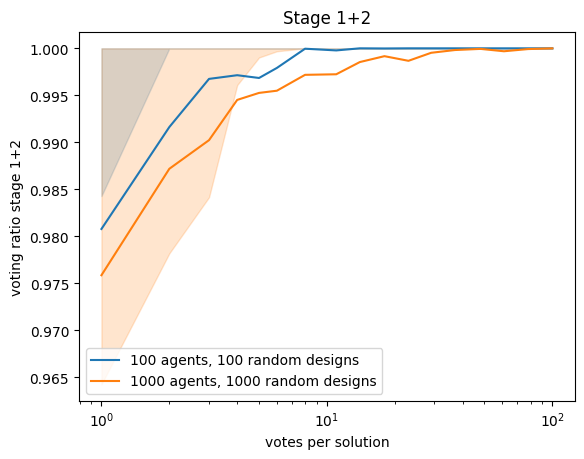

In [11]:


d1 = data[data['number of agents'] == 100]
d1 = d1[d1['number of created designs'] == 101]

d2 = data[data['number of agents'] == 1000]
d2 = d2[d2['number of created designs'] == 1001]


fig1, ax1 = plt.subplots()
sns.lineplot(d1, ax=ax1, x='votes per solution', y='voting ratio stage 1', errorbar=('pi',50), label='100 agents, 100 random designs')
sns.lineplot(d2, ax=ax1, x='votes per solution', y='voting ratio stage 1', errorbar=('pi',50), label='1000 agents, 1000 random designs')

ax1.set(title='Stage 1', xscale='log')

fig2, ax2 = plt.subplots()
sns.lineplot(d1, ax=ax2, x='votes per solution', y='voting ratio stage 1+2', errorbar=('pi',50), label='100 agents, 100 random designs')
sns.lineplot(d2, ax=ax2, x='votes per solution', y='voting ratio stage 1+2', errorbar=('pi',50), label='1000 agents, 1000 random designs')

ax2.set(title='Stage 1+2', xscale='log')
